#  Load and Inspect the Dataset


In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load the dataset
dataset_path = 'Combined Data.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(dataset_path)


In [6]:
# Inspect the first few rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))


First 10 rows of the dataset:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety
5           5  every break, you must be nervous, like somethi...  Anxiety
6           6  I feel scared, anxious, what can I do? And may...  Anxiety
7           7    Have you ever felt nervous but didn't know why?  Anxiety
8           8  I haven't slept well for 2 days, it's like I'm...  Anxiety
9           9                 I'm really worried, I want to cry.  Anxiety


In [7]:
# Inspect the structure of the dataset
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [8]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())



Missing Values in the Dataset:
Unnamed: 0      0
statement     362
status          0
dtype: int64


In [9]:
# Basic statistics of the dataset
print("\nBasic Statistics:")
print(data.describe(include='all'))



Basic Statistics:
          Unnamed: 0          statement  status
count   53043.000000              52681   53043
unique           NaN              51073       7
top              NaN  what do you mean?  Normal
freq             NaN                 22   16351
mean    26521.000000                NaN     NaN
std     15312.339501                NaN     NaN
min         0.000000                NaN     NaN
25%     13260.500000                NaN     NaN
50%     26521.000000                NaN     NaN
75%     39781.500000                NaN     NaN
max     53042.000000                NaN     NaN


#  Cleanup and Exploration


In [11]:
# Drop the redundant column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Handle missing values in the 'statement' column
# Option 1: Drop rows with missing statements
data_cleaned = data_cleaned.dropna(subset=['statement'])

# Explore the distribution of the 'status' column
print("\nClass Distribution in 'status':")
print(data_cleaned['status'].value_counts())



Class Distribution in 'status':
status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


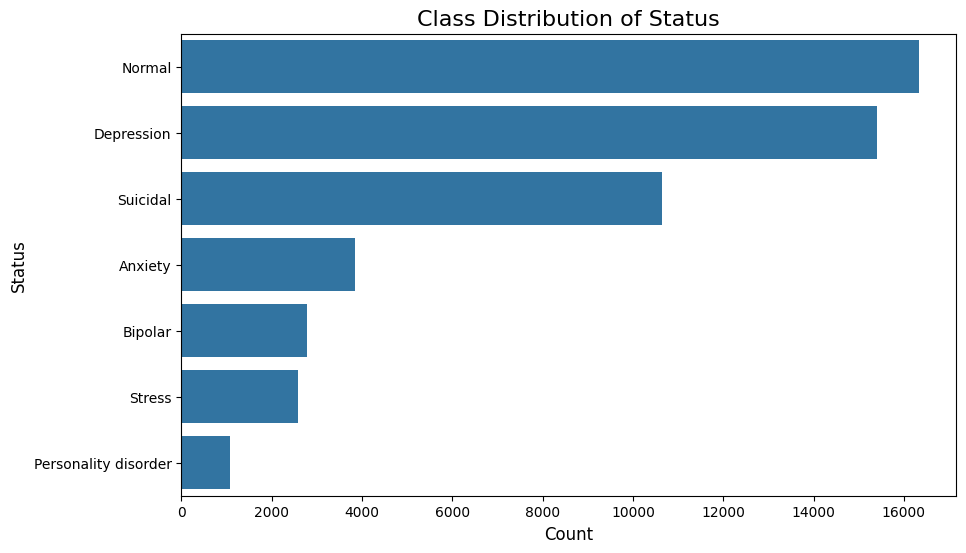

In [12]:
# Visualize the distribution using a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, y='status', order=data_cleaned['status'].value_counts().index)
plt.title('Class Distribution of Status', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Status', fontsize=12)
plt.show()


<ipython-input-38-8c9ab6402e78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sentiment'] = data_clean['statement'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


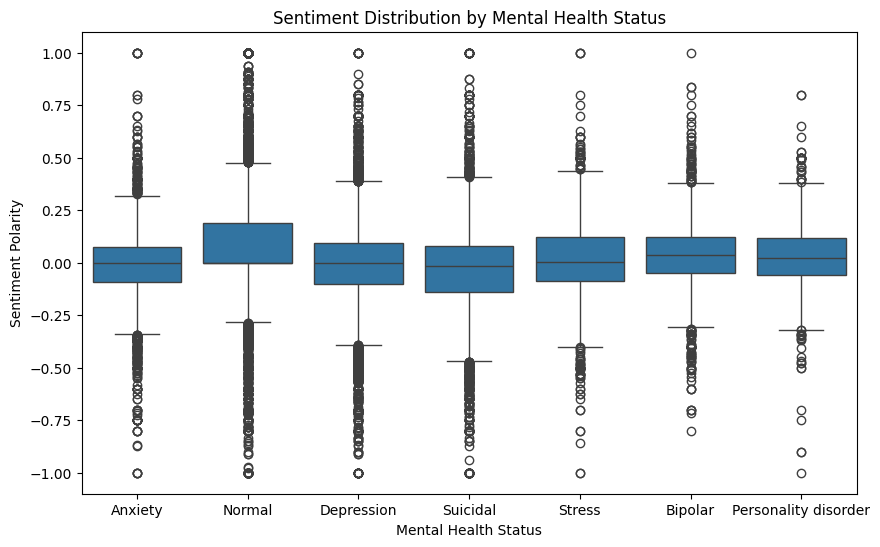

In [38]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing statements
data_clean = data.dropna(subset=['statement'])

# Sentiment analysis (polarity)
data_clean['sentiment'] = data_clean['statement'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize sentiment vs. mental health status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='sentiment', data=data_clean)
plt.title('Sentiment Distribution by Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Sentiment Polarity')
plt.show()

In [39]:
# Calculate correlation between sentiment and mental health status
sentiment_status_corr = data_clean.groupby('status')['sentiment'].mean()
print("\nAverage Sentiment by Mental Health Status:")
print(sentiment_status_corr)



Average Sentiment by Mental Health Status:
status
Anxiety                -0.012196
Bipolar                 0.036147
Depression             -0.005096
Normal                  0.057021
Personality disorder    0.029567
Stress                  0.013723
Suicidal               -0.038078
Name: sentiment, dtype: float64


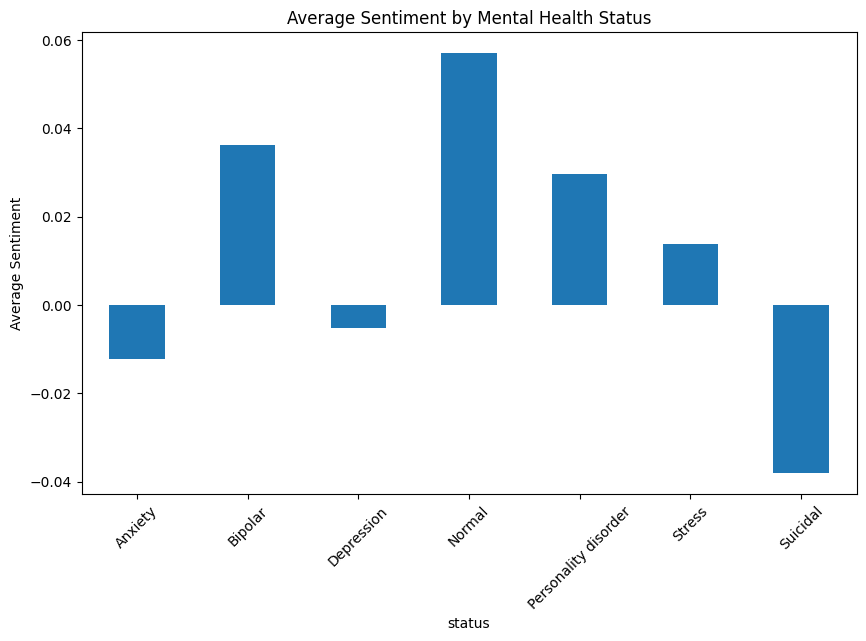

In [54]:
# Bar plot of average sentiment by mental health status
sentiment_status_corr.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sentiment by Mental Health Status')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()


In [37]:
from scipy.stats import f_oneway

# Perform ANOVA to check if sentiment varies significantly by mental health status
grouped_data = [data_clean[data_clean['status'] == status]['sentiment'] for status in data_clean['status'].unique()]
anova_result = f_oneway(*grouped_data)

print("ANOVA p-value:", anova_result.pvalue)


ANOVA p-value: 3.1669909877431535e-266


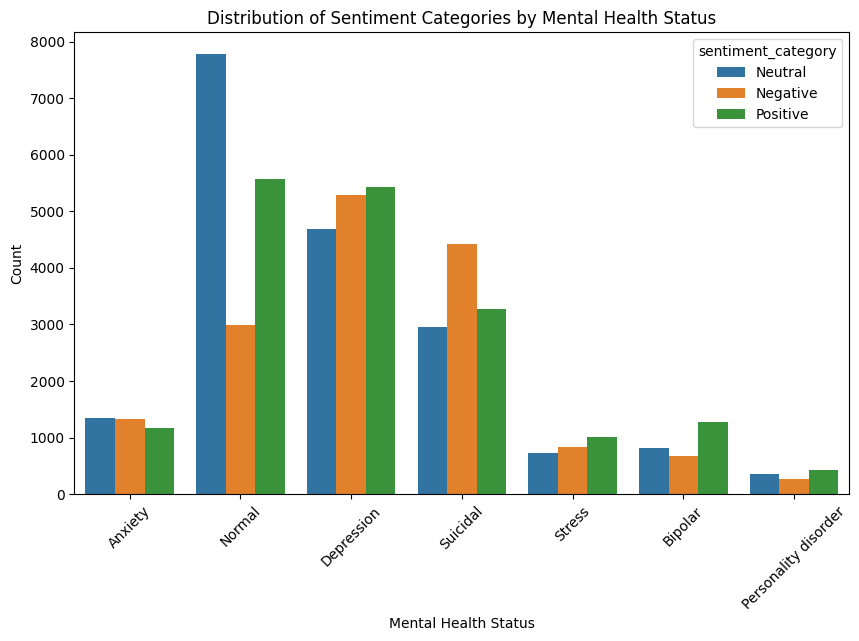

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to visualize sentiment distribution across mental health statuses
plt.figure(figsize=(10, 6))
sns.countplot(x='status', hue='sentiment_category', data=data_clean)
plt.title("Distribution of Sentiment Categories by Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [45]:
# Pivot table for sentiment categories by mental health status
pivot_table_category = data_clean.pivot_table(values='sentiment_category', index='status', aggfunc=lambda x: (x == 'Positive').sum())
print(pivot_table_category)


                      sentiment_category
status                                  
Anxiety                             1170
Bipolar                             1271
Depression                          5425
Normal                              5570
Personality disorder                 435
Stress                              1013
Suicidal                            3265


In [44]:
# Pivot table for average sentiment by mental health status
pivot_table = data_clean.pivot_table(values='sentiment', index='status', aggfunc='mean')
print(pivot_table)



                      sentiment
status                         
Anxiety               -0.012196
Bipolar                0.036147
Depression            -0.005096
Normal                 0.057021
Personality disorder   0.029567
Stress                 0.013723
Suicidal              -0.038078


#  Feature Extraction and Model Evaluation

In [18]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features to reduce complexity

# Fit and transform the 'processed_statement' column to extract features
X = vectorizer.fit_transform(data_cleaned['processed_statement'])

# Check the shape of the feature matrix
print("Shape of Feature Matrix (X):", X.shape)

# Display sample features (First row in matrix)
print("Sample Features (First Row):", X[0].toarray())


Shape of Feature Matrix (X): (52681, 5000)
Sample Features (First Row): [[0. 0. 0. ... 0. 0. 0.]]


In [26]:
# Now handle the labels
# Mapping status labels to numerical values
y = data_cleaned['status'].map({
    'Normal': 0, 'Depression': 1, 'Suicidal': 2, 'Anxiety': 3,
    'Bipolar': 4, 'Stress': 5, 'Personality disorder': 6
})

# Ensure that the number of samples in X and y is consistent
print(f"Shape of Feature Matrix (X): {X.shape}")
print(f"Shape of Labels (y): {y.shape}")


Shape of Feature Matrix (X): (52681, 5000)
Shape of Labels (y): (52681,)


In [27]:
# Split the data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report (precision, recall, F1 score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 76.82%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      3308
           1       0.71      0.73      0.72      3016
           2       0.68      0.64      0.66      2158
           3       0.83      0.77      0.80       755
           4       0.85      0.74      0.79       527
           5       0.73      0.50      0.59       536
           6       0.87      0.49      0.63       237

    accuracy                           0.77     10537
   macro avg       0.79      0.69      0.73     10537
weighted avg       0.77      0.77      0.76     10537



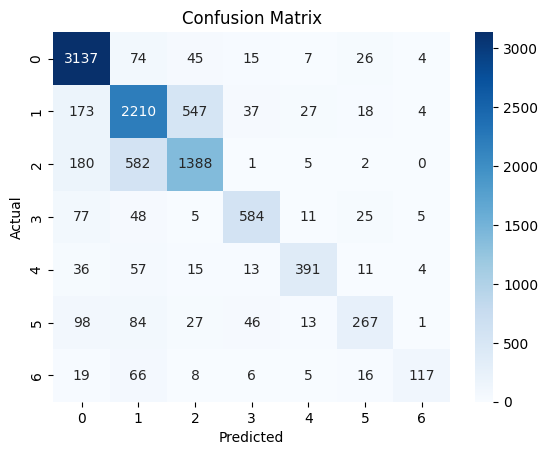

In [28]:
# Confusion Matrix to visualize performance on different classes
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Distribution of Sentiment Scores

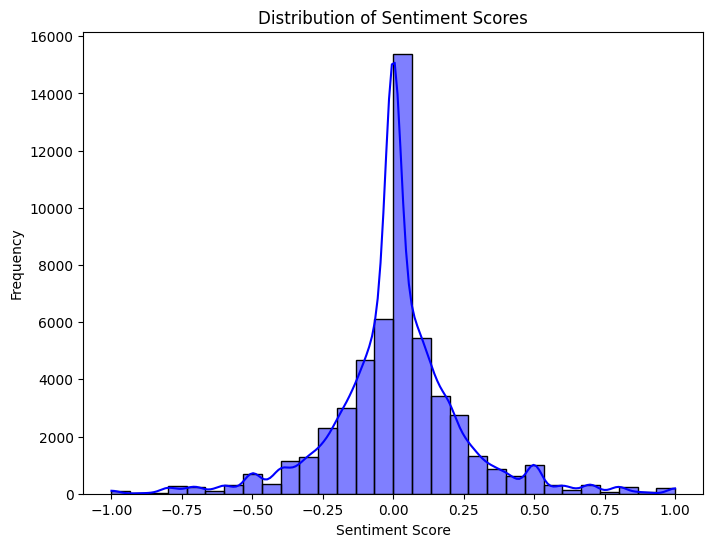

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(data_clean['sentiment'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Average Sentiment by Mental Health Status

<ipython-input-57-ea132a36c305>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sentiment.index, y=average_sentiment.values, palette='viridis')


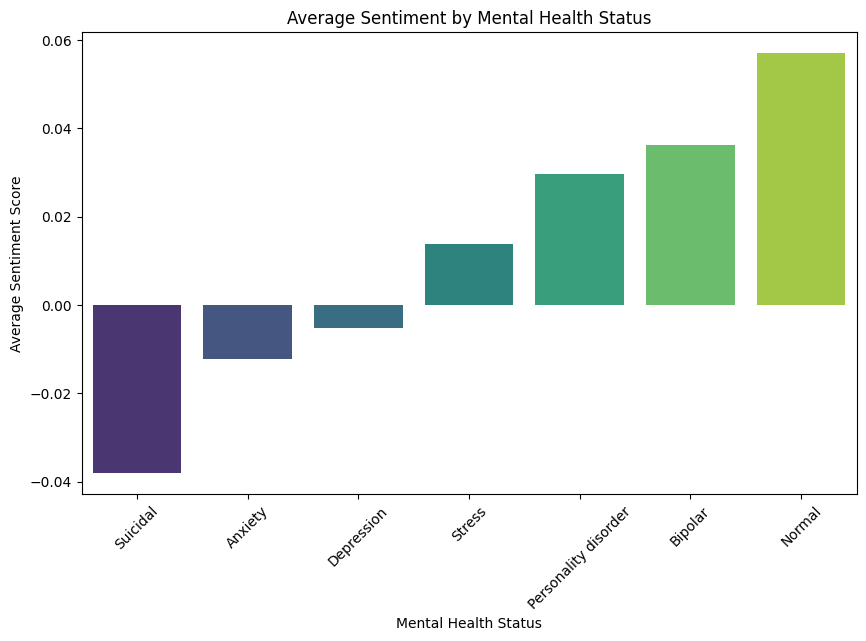

In [57]:
# Average sentiment by mental health status
average_sentiment = data_clean.groupby('status')['sentiment'].mean().sort_values()

# Plotting the average sentiment for each mental health status
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sentiment.index, y=average_sentiment.values, palette='viridis')
plt.title('Average Sentiment by Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


# Sentiment Distribution by Mental Health Status

<ipython-input-58-a0be77b37554>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='sentiment', data=data_clean, palette='Set2')


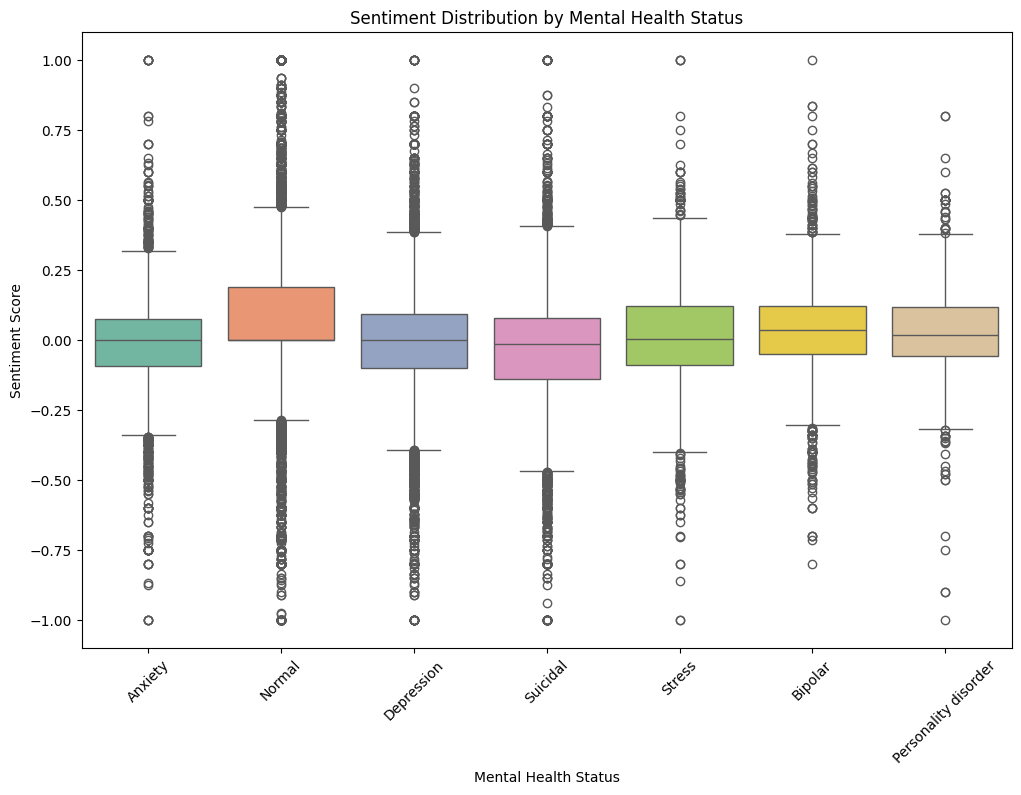

In [58]:
# Plotting sentiment distribution by mental health status
plt.figure(figsize=(12, 8))
sns.boxplot(x='status', y='sentiment', data=data_clean, palette='Set2')
plt.title('Sentiment Distribution by Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


# Word Cloud for Each Mental Health Status

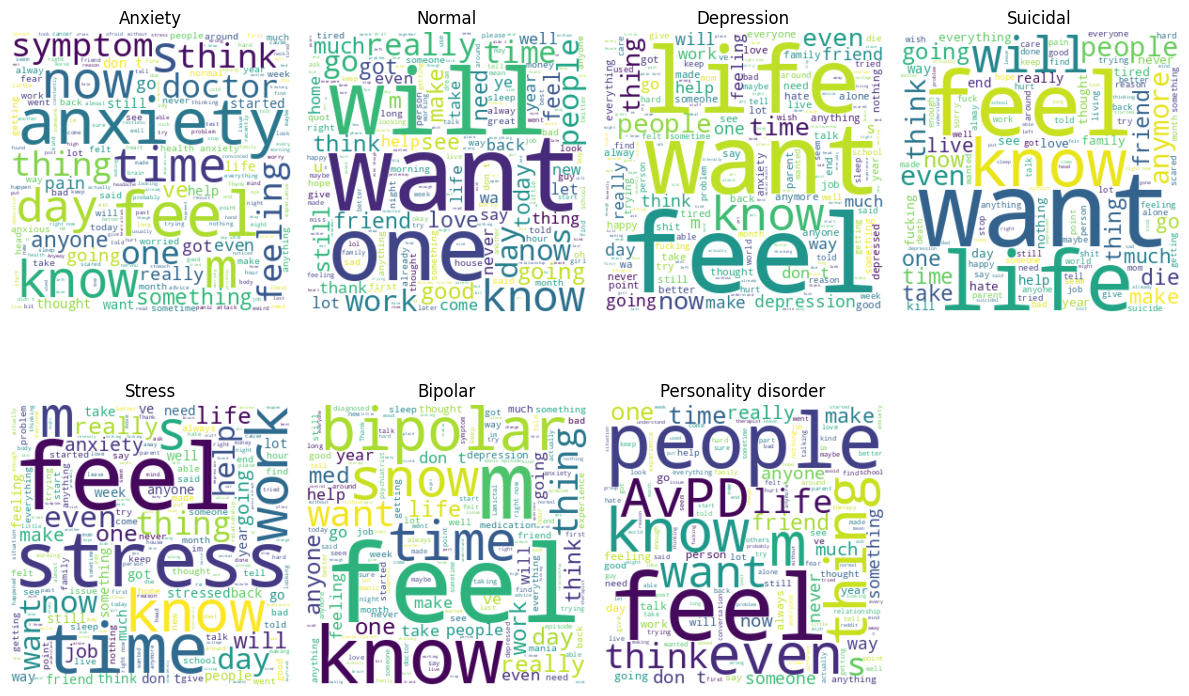

In [60]:
from wordcloud import WordCloud

# Generate word clouds for each mental health status
plt.figure(figsize=(12, 8))
for i, status in enumerate(data_clean['status'].unique()):
    plt.subplot(2, 4, i+1)
    status_text = ' '.join(data_clean[data_clean['status'] == status]['statement'].dropna())
    wordcloud = WordCloud(width=300, height=300, background_color='white').generate(status_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(status)
    plt.axis('off')

plt.tight_layout()
plt.show()



# Sentiment vs. Mental Health Status

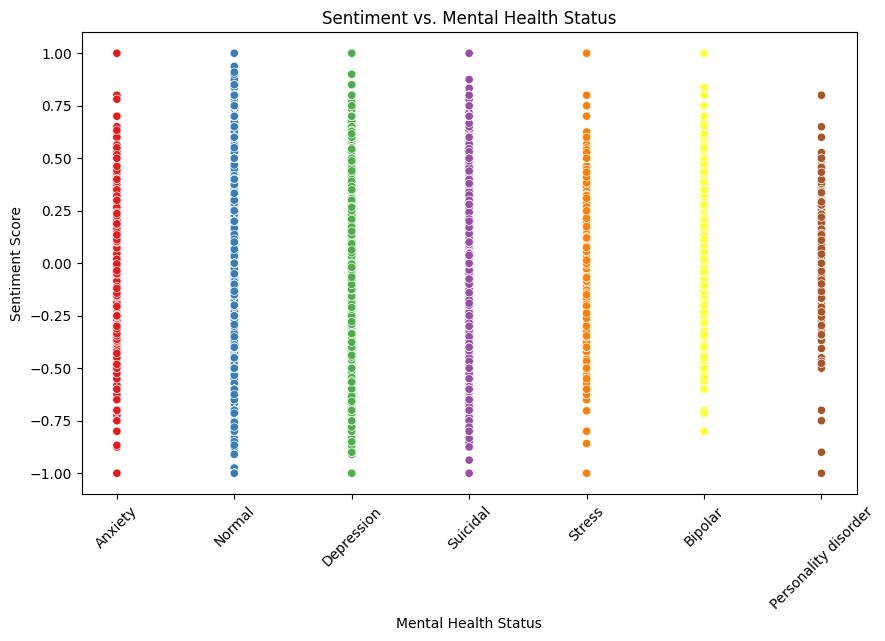

In [62]:
# Scatter plot of sentiment vs. mental health status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='status', y='sentiment', data=data_clean, hue='status', palette='Set1', legend=None)
plt.title('Sentiment vs. Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


# Correlation Heatmap for Sentiment and Other Features

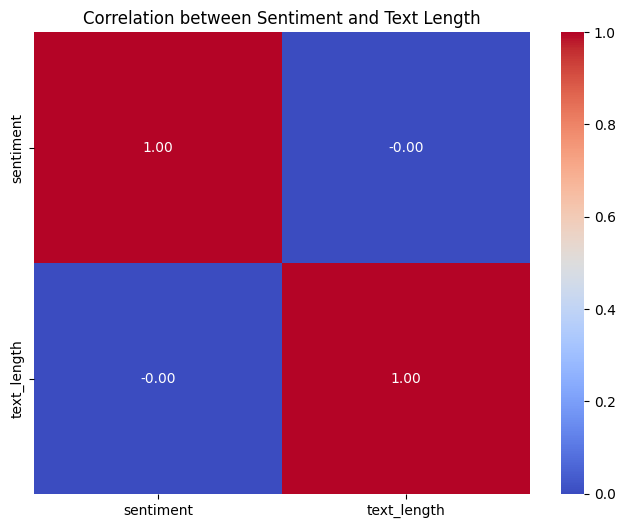

In [63]:
# Assuming you have numerical features like 'text_length'
data_clean['text_length'] = data_clean['statement'].apply(lambda x: len(str(x)))

# Correlation matrix between sentiment and text_length
correlation_matrix = data_clean[['sentiment', 'text_length']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Sentiment and Text Length")
plt.show()


# Sentiment Distribution by Sentiment Category

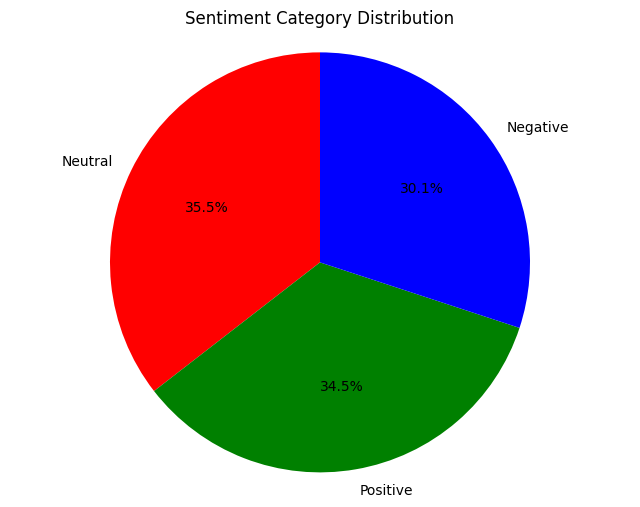

In [65]:
# Pie chart of sentiment categories
sentiment_category_counts = data_clean['sentiment_category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_category_counts, labels=sentiment_category_counts.index, autopct='%1.1f%%', colors=['red', 'green', 'blue'], startangle=90)
plt.title('Sentiment Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


# Sentiment Boxplot by Sentiment Category

<ipython-input-66-838d08300b87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_category', y='sentiment', data=data_clean, palette='coolwarm')


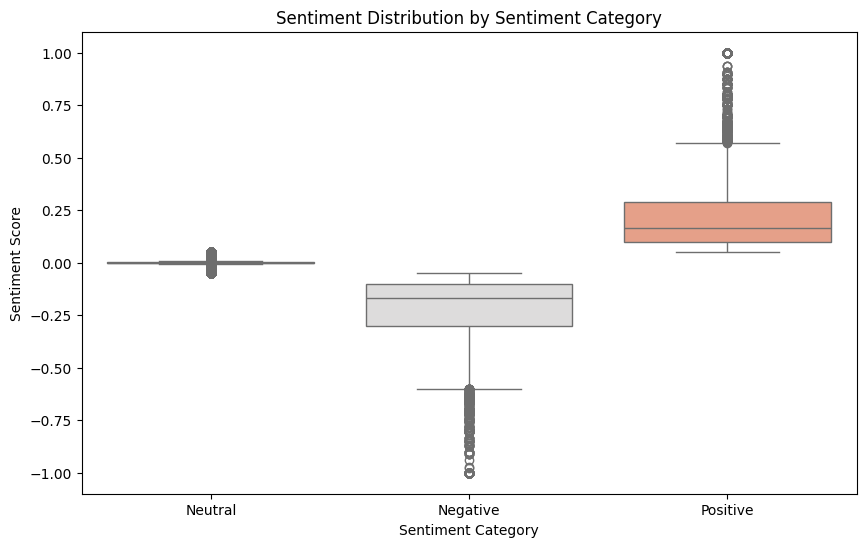

In [66]:
# Boxplot of sentiment by sentiment category
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='sentiment', data=data_clean, palette='coolwarm')
plt.title('Sentiment Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()


# Correlation Heatmap for Numerical Features

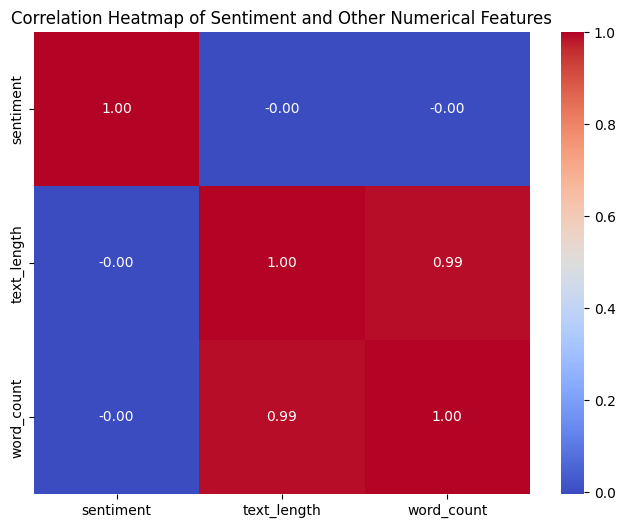

In [67]:
# Assuming 'text_length' and 'word_count' are numerical columns
data_clean['word_count'] = data_clean['statement'].apply(lambda x: len(str(x).split()))

# Select numerical columns for correlation analysis
numerical_data = data_clean[['sentiment', 'text_length', 'word_count']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Sentiment and Other Numerical Features')
plt.show()


#  Word Cloud for Sentiment Categories

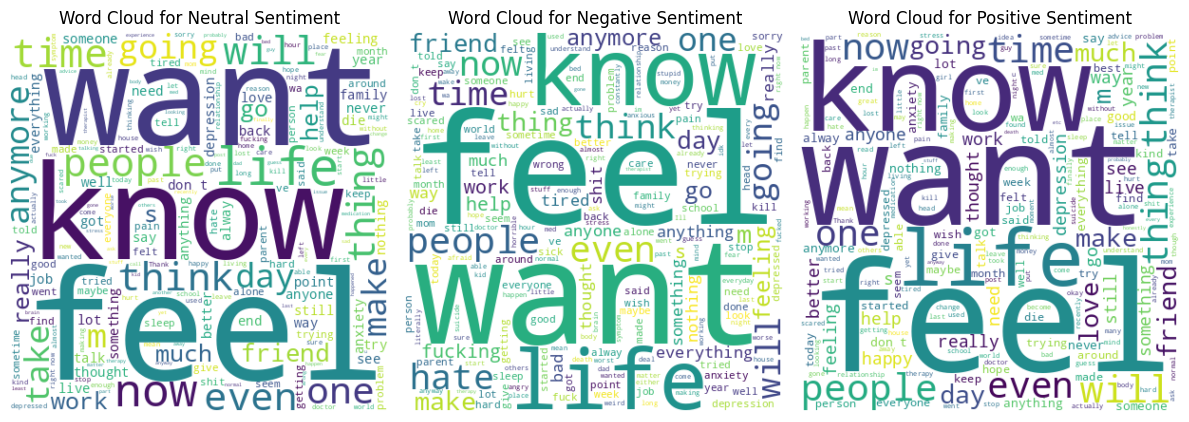

In [69]:
# Generate word clouds for each sentiment category
plt.figure(figsize=(12, 10))
for i, sentiment in enumerate(data_clean['sentiment_category'].unique()):
    plt.subplot(1, 3, i+1)
    sentiment_text = ' '.join(data_clean[data_clean['sentiment_category'] == sentiment]['statement'].dropna())
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(sentiment_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Top N Most Frequent Words

<ipython-input-70-32e14a696eaf>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


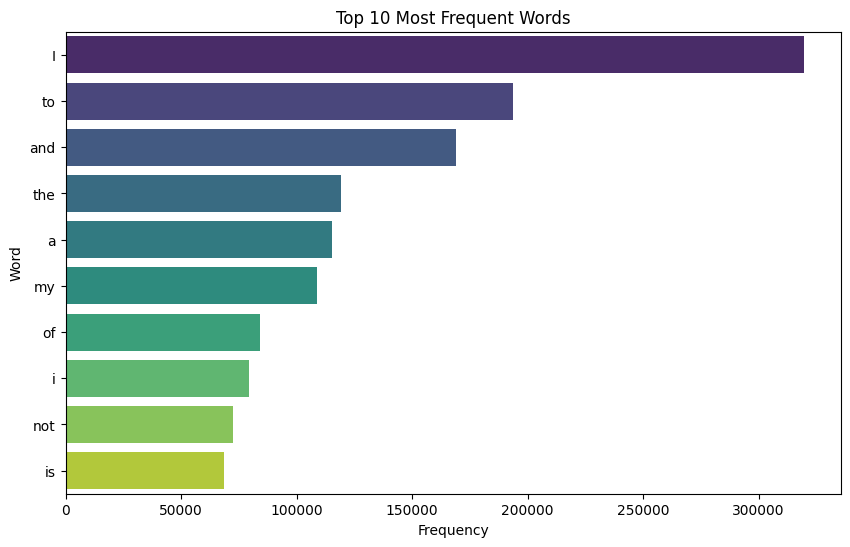

In [70]:
from collections import Counter
import numpy as np

# Tokenize all the statements and count word frequencies
all_words = ' '.join(data_clean['statement'].dropna()).split()
word_counts = Counter(all_words)

# Get the top N most frequent words
top_n = 10
top_words = word_counts.most_common(top_n)

# Plot the top N most frequent words
words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


# Pairplot for Sentiment and Other Features

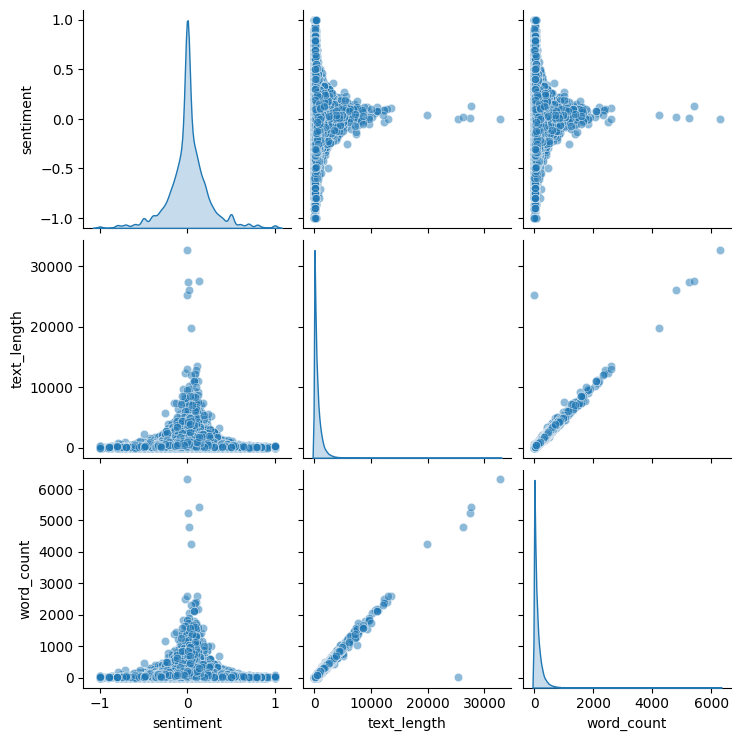

In [72]:
# Pairplot to visualize relationships between sentiment and other features
sns.pairplot(data_clean[['sentiment', 'text_length', 'word_count']], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


# Sentiment vs. Text Length (Scatter Plot)

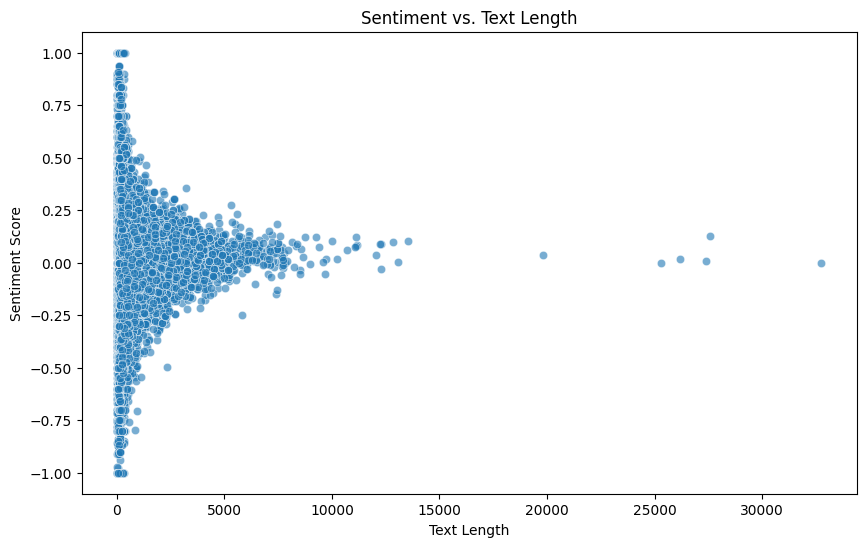

In [74]:
# Scatter plot of sentiment vs. text length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='sentiment', data=data_clean, alpha=0.6)
plt.title('Sentiment vs. Text Length')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.show()


# Sentiment vs. Word Count (Scatter Plot)

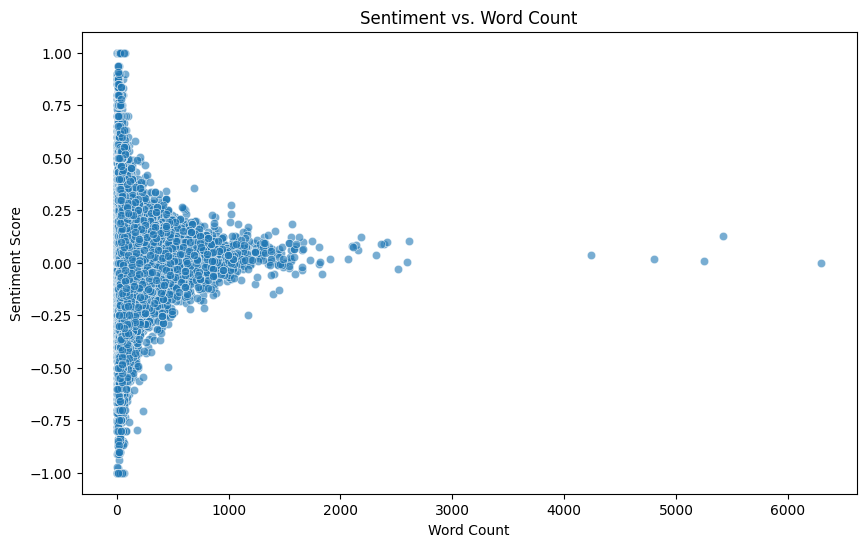

In [73]:
# Scatter plot of sentiment vs. word count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='sentiment', data=data_clean, alpha=0.6)
plt.title('Sentiment vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Score')
plt.show()
